In [69]:
# Libaries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [70]:
# Define the new working directory path
new_working_directory = r'/Users/nicol1/Documents/GitHub/sports-data'

# Change the current working directory
os.chdir(new_working_directory)

In [71]:
# Define the path 
data_folder = 'data/'

# Load the CSV files to df
cleaned_df = pd.read_csv(data_folder + 'cleaned_df.csv')
cleaned_df

,player_id,name,country,height,foot,position,highest_market_value,current_club_domestic_competition_id,number_games_played,total_minutes,...,red_cards_sum,red_cards_avg,goals,avg_goals_per_game,assists,age,year,avg_games_per_year,avg_goals_per_year,avg_assists_per_year
0,122011,Markus Henriksen,Norway,187.0,right,Defender,5000000.0,GB1,165,12199,...,1,0.006061,33,0.200000,22,45.0,6,27.500000,5.500000,3.666667
1,14940,Razvan Rat,Romania,179.0,left,Defender,6500000.0,ES1,97,7690,...,1,0.010309,3,0.030928,13,43.0,5,19.400000,0.600000,2.600000
2,14942,Darijo Srna,Croatia,182.0,right,Defender,17500000.0,IT1,227,19598,...,2,0.008811,22,0.096916,68,45.0,8,28.375000,2.750000,8.500000
3,26267,Fernandinho,Brazil,179.0,right,Midfield,32000000.0,GB1,399,30325,...,3,0.007519,29,0.072682,41,42.0,11,36.272727,2.636364,3.727273
4,55735,Henrikh Mkhitaryan,Armenia,177.0,both,Midfield,37000000.0,IT1,485,35878,...,0,0.000000,128,0.263918,119,43.0,13,37.307692,9.846154,9.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8071,941869,Yellu Santiago,Spain,192.0,right,Midfield,100000.0,ES1,3,153,...,0,0.000000,0,0.000000,0,26.0,1,3.000000,0.000000,0.000000
8072,667991,Alaa Bellaarouch,Morocco,188.0,right,Goalkeeper,200000.0,FR1,1,90,...,0,0.000000,0,0.000000,0,27.0,1,1.000000,0.000000,0.000000
8073,405690,Ole Pohlmann,Germany,183.0,right,Midfield,700000.0,L1,1,31,...,0,0.000000,0,0.000000,0,26.0,1,1.000000,0.000000,0.000000
8074,225963,Lautaro Giannetti,Argentina,185.0,right,Defender,5000000.0,IT1,1,90,...,0,0.000000,0,0.000000,0,27.0,1,1.000000,0.000000,0.000000


In [72]:
# Filter the position for goalkeeper
striker_df = cleaned_df[cleaned_df['position'] == 'Attack']
striker_df
#print(goalkeeper_df.head)
# drop NaN values
striker_df = striker_df.dropna()


# Fairplay index
yellow_card_weight = 1
red_card_weight = 3

composite_score = striker_df['yellow_cards_avg'] * yellow_card_weight + striker_df['red_cards_avg'] * red_card_weight
fairplay_index = (composite_score - composite_score.min()) / (composite_score.max() - composite_score.min())
striker_df['fairplay_index'] = fairplay_index

In [73]:
# Select only numeric columns
col_remove = ['player_id', 'highest_market_value', 'red_cards_sum', 'red_cards_avg', 'yellow_cards_sum', 'yellow_cards_avg']
striker_df_without = striker_df.drop(columns = col_remove)
numeric_columns = striker_df_without.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print corr matrix
print(correlation_matrix)



                        height  number_games_played  total_minutes  \
height                1.000000             0.017280       0.011154   
number_games_played   0.017280             1.000000       0.982217   
total_minutes         0.011154             0.982217       1.000000   
average_minutes       0.029461             0.550738       0.579885   
goals                 0.072450             0.841676       0.887257   
avg_goals_per_game    0.160649             0.518394       0.546830   
assists              -0.048847             0.877824       0.911179   
age                  -0.028779             0.363659       0.368435   
year                  0.035073             0.926214       0.880010   
avg_games_per_year    0.028734             0.870453       0.848261   
avg_goals_per_year    0.106931             0.781548       0.824748   
avg_assists_per_year -0.065049             0.795726       0.827472   
fairplay_index       -0.001691             0.091126       0.097075   

                   

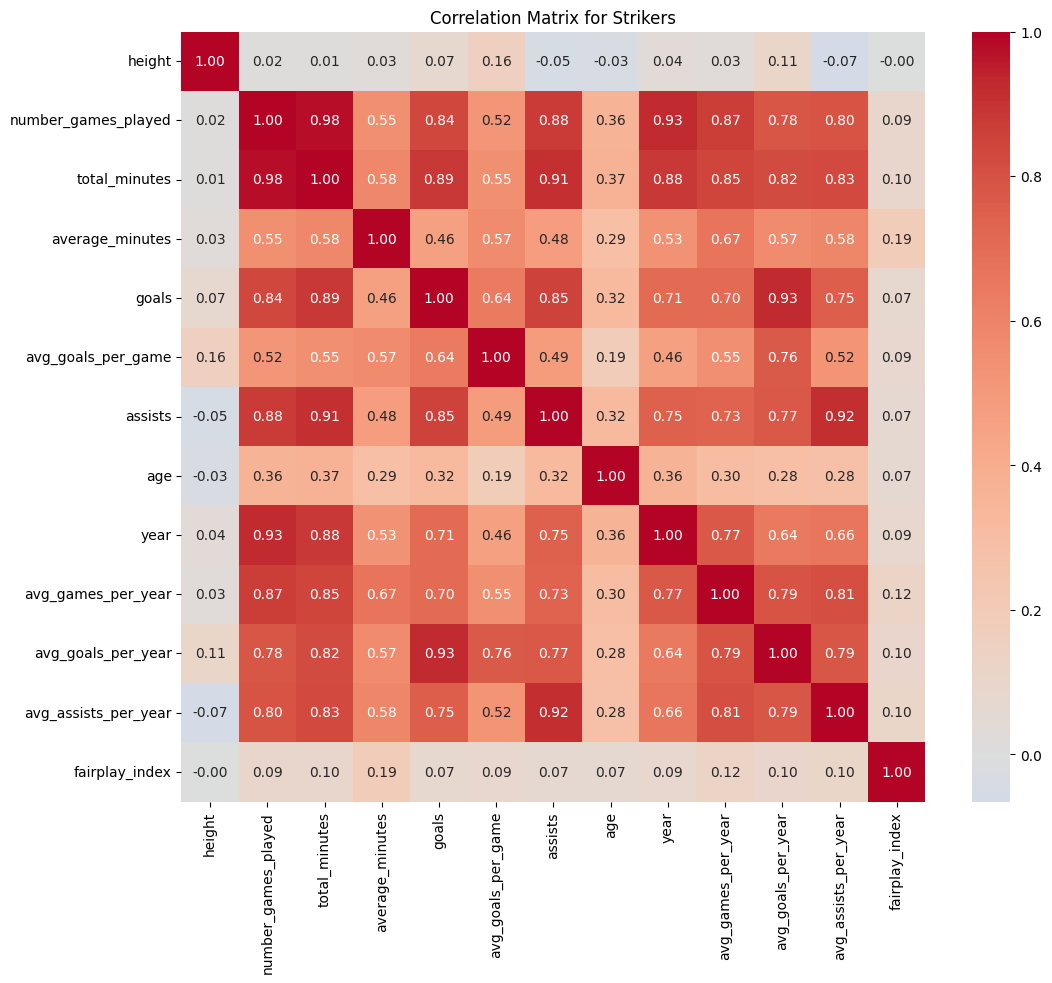

In [74]:
# Plotting correlation matrix


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Matrix for Strikers')
plt.show()
# bei 0 sollte es weiss sein und dann nicht korreliert und negativ korreliert sollten sich fabrlich unterscheiden (nach anderen colorcode suchen)
# highest market value rausnehmen (dependent variable), player ID auch rausnhemen
# hochkorrelierte attributen: (keine PCA!!!) 
# filtern
# highest market value ist überall hoch korreliert (negativ oder positiv)
# minutes vs total games: minutes was uns interessiert
# wenn etwas nicht korreliert ist mit market value NICht rauswerfen kann immer noch zsmhang haben der nicht linear ist
# avg minutes, total minutes, number games: zusammensetzten von avg. minutes und number games: ist es für markt wichtig viele spiele mit wenig spielen oder wenig spiele mit vielen minuten (feature construction)
# yellow and red cards zusammennehmen: fairplay index? 

#Correlation Matrix
- total minutes vs number games = high correlation: we want the total minutes
- total minutes: 
    - high corelation to goals
    -  total minutes and asist have a high correlation 
    - high correlation to avg_assist / avg_goals = also have high correlation between avg_assist_per_year and assist = we keep avg_assists_per_year
    - high correlation to  year and avg_games per year (high correlation between those two) = keep avg_gamess_per_year
- average minutes:
    - no high correlation
goals:
    - high correlation  to total_minutes
    - high correlation to assists
    - high correlation to year and avg_games_per_year
    - high correlation to avg_goals _per_year
    => drop goals vor avg_goals per year


- high correlation between avg_gales_per game and avg_goals per year 
    keep avg_goals_per_Year

keeping: total_minutes, avg_minutes, year, avg_games_per_year, avg_goals_per_year, age, fairplay_index and avg_assist_per_year



In [77]:

# Divide data into IV (X) y DV (y)
X = striker_df[['total_minutes', 'average_minutes', 'fairplay_index',
          'age', 'year', 'avg_games_per_year', 'avg_goals_per_year', 'avg_assists_per_year']]
y = striker_df['highest_market_value']

# Divide data into trial and error 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression Model
model = LinearRegression()

# Train
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


import statsmodels.api as sm

# Add a constant to the X_train data for the intercept term
X_train_with_const = sm.add_constant(X_train)

# Initialize and fit the model
linear_model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary of the model which includes p-values
print(linear_model.summary())

Coefficients: [ 2.52021389e+02 -6.66197557e+04 -1.41725992e+07 -4.17740641e+05
  5.58868900e+04 -4.34768138e+05  2.56079661e+06  6.38726625e+06]
Intercept: 16558433.251821334
                             OLS Regression Results                             
Dep. Variable:     highest_market_value   R-squared:                       0.639
Model:                              OLS   Adj. R-squared:                  0.638
Method:                   Least Squares   F-statistic:                     369.3
Date:                  Sun, 18 Feb 2024   Prob (F-statistic):               0.00
Time:                          14:38:56   Log-Likelihood:                -29785.
No. Observations:                  1676   AIC:                         5.959e+04
Df Residuals:                      1667   BIC:                         5.964e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
               